# ZADÁNÍ [TODO - ODSTRANIT]
## 1. část
### Proveďte explorativní analýzu zvolené datové sady
Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
- prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají 
    - počet hodnot, 
    - nejčastější hodnoty, 
    - rozsah hodnot atd.
- prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů
    - zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. 
    - do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. 
        - bodový graf, 
        - histogram, 
        - krabicový nebo houslový graf, 
        - graf složený z více podgrafů apod. 
    - věnujte se různým atributům
    - v dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst
- zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty
    - v dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, 
    - a jaké hodnoty jste objevili
- proveďte podrobnou analýzu chybějící hodnot. 
    - v dokumentaci popište celkový počet chybějících hodnot, 
    - počet objektů s více chybějícími hodnotami atd.
- proveďte korelační analýzu numerických atributů 
    - k analýze využijte grafy
    - i korelační koeficienty

## 2. část
V rámci přípravy datové sady proveďte následující kroky:
- z datové sady odstraňte atributy, které jsou pro danou dolovací úlohu irelevantní
- v datové sadě, pokud možno, ponechte:
    - kategorické,
    - numerické atributy, 
    - atributy s chybějícími hodnotami a 
    - atributy s odlehlými hodnotami (pokud je původní datová sada obsahuje)
- vypořádejte se s chybějícími hodnotami. 
    - pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot
- vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny
### Připravte 2 varianty datové sady vhodné pro dolovací algoritmy
- můžete uvažovat dolovací úlohu uvedenou u datové sady nebo navrhnout vlastní dolovací úlohy
- v případě vlastní dolovací úlohy ji specifikujte v dokumentaci
- pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.
- pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.


In [1]:
# Import modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
# Load the dataset to pandas dataframe df
file = "students_mental_health_survey.csv"
df = pd.read_csv(file)
# print(df)

## Explorativní analýza

Pro zvolenou datovou sadu byla nejdříve provedena explorativní analýza, kde byly analyzovány jednotlivé atributy, které datová sada obsahuje, a hodnoty, kterých tyto atributy nabývají. Jelikož se v této datové sadě vyskytuje většina atributů kategorických a jen zlomek kvantitativních, tak jsme využívali dost histogramů, boxplotů a houslových grafů. 

In [3]:
# Get info about the dataset
## TODO this is shown elsewhere  
# print(df.info())

V námi vzbraném datasetu jsme nalezli následující atributy: 

- Age: Věk studenta  
- Course: Obor studia  
- Gender: Pohlaví studenta  
- CGPA: Akademický průměr známek  
- Stress_Level: Úroveň stresu, který student zažívá  
- Depression_Score: Skóre vyjadřující úroveň deprese, kterou student zažívá  
- Anxiety_Score: Skóre vyjadřující úroveň úzkosti, kterou student zažívá  
- Sleep_Quality: Kvalita spánku studenta  
- Physical_Activity: Úroveň fyzické aktivity studenta  
- Diet_Quality (Kvalita stravy): Kvalita stravy studenta  
- Social_Support : Úroveň sociální podpory, které se studentovi dostává  
- Relationship_Status: Rodinný status studenta  
- Substance_Use: Frekvence užívání návykových látek, jako je alkohol, cigarety nebo jiné drogy  
- Counseling_Service_Use: Frekvence navštěvování odborného poradenství  
- Family_History: Zda má student v rodinné anamnéze problémy s duševním zdravím  
- Chronic_Illness: Zda má student chronické problémy  
- Financial_Stress: Úroveň finančního stresu, který student zažívá  
- Extracurricular_Involvement: Zapojování se do mimoškolní činnosti  
- Semester_Credit_Load: Počet kreditů, které student v daném semestru absolvuje  
- Residence_Type: Typ bydliště studenta  

In [23]:
kvantitative_attributes = ['Age', 'CGPA', 'Semester_Credit_Load']
categorical_attributes = []

unique_values_array = []  # Initialize an empty array to store unique values

# Iterate over columns
for col in df.columns:
    unique_values = df[col].unique()
    unique_values_array.append((col, unique_values))

sorted_unique_values_array = []
for col, values in unique_values_array:
    if col in kvantitative_attributes:
        min_val, max_val = df[col].min(), df[col].max()
        interval = f"{min_val} - {max_val}"
        sorted_values = [interval]
    else:
        # prevent nan
        sorted_values = sorted(values, key=lambda x: ('' if pd.isna(x) else str(x)))
        # save the attribute to cathegorical
        categorical_attributes.append(col)
    sorted_unique_values_array.append((col, sorted_values))


Datová sada obsahuje 20 atributů, z nichž 3 atributy by se daly zařadit mezi kvantitativní a zbývajících 17 atributů je kategorických. Jednotlivé kategorické atributy mohou nabývat následujících hodnot. 

In [5]:
# Print the attributes and their values for the excluded columns
for col, values in sorted_unique_values_array:
    if col in categorical_attributes:
        print(f"{col}: [{', '.join(map(str, values))}]")

Course: [Business, Computer Science, Engineering, Law, Medical, Others]
Gender: [Female, Male]
Stress_Level: [0, 1, 2, 3, 4, 5]
Depression_Score: [0, 1, 2, 3, 4, 5]
Anxiety_Score: [0, 1, 2, 3, 4, 5]
Sleep_Quality: [Average, Good, Poor]
Physical_Activity: [High, Low, Moderate]
Diet_Quality: [Average, Good, Poor]
Social_Support: [High, Low, Moderate]
Relationship_Status: [In a Relationship, Married, Single]
Substance_Use: [nan, Frequently, Never, Occasionally]
Counseling_Service_Use: [Frequently, Never, Occasionally]
Family_History: [No, Yes]
Chronic_Illness: [No, Yes]
Financial_Stress: [0, 1, 2, 3, 4, 5]
Extracurricular_Involvement: [High, Low, Moderate]
Residence_Type: [Off-Campus, On-Campus, With Family]


Rozsah hodnot jednotlivých kvantitativních atributů jsme vyjádřili pomocí intervalů. Hodnoty, které jednotlivé kvantitativní atributy mohou nabývat jsou následující:

In [6]:
# Print the attributes and their values for the excluded columns
for col, values in sorted_unique_values_array:
    if col in kvantitative_attributes:
        print(f"{col}: {', '.join(map(str, values))}")

Age: 18 - 35
CGPA: 2.44 - 4.0
Semester_Credit_Load: 15 - 29


Na následujících histogramech je možné vidět četnost jednotlivých hodnot pro dané kategorické atributy.

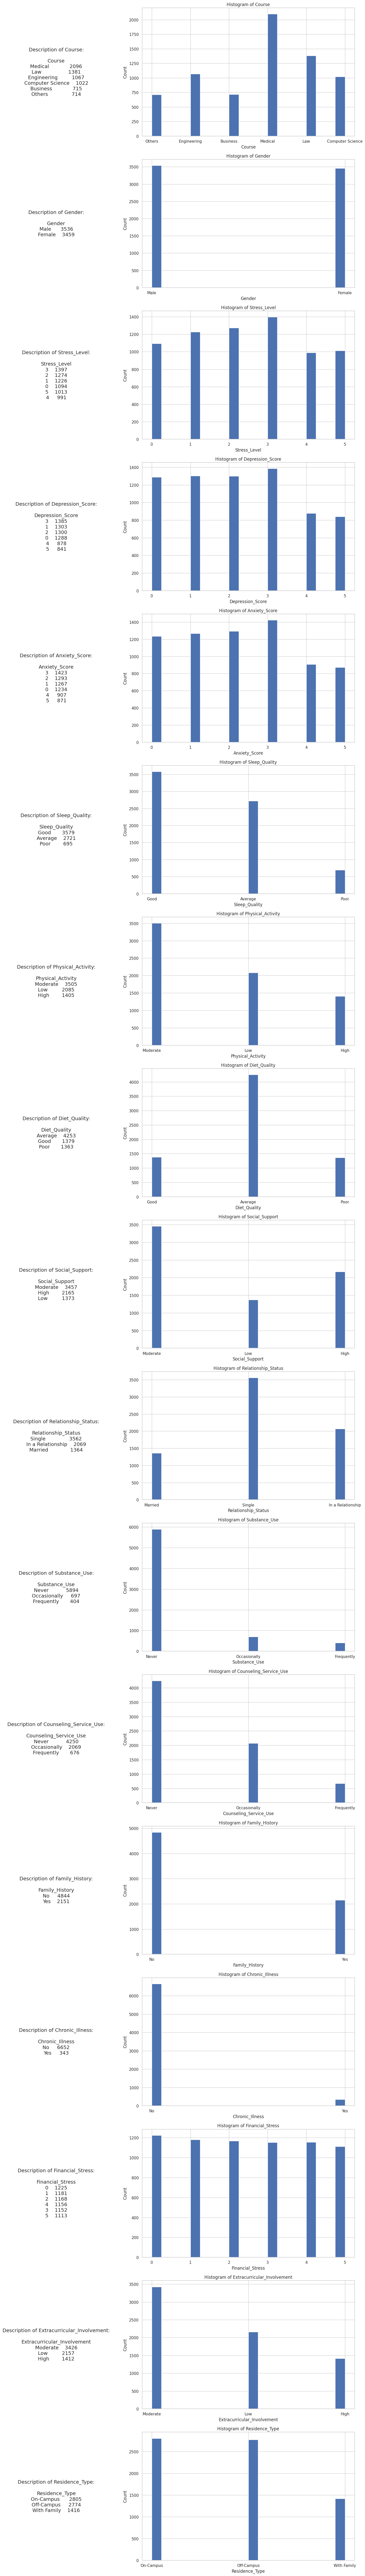

In [24]:
num_cols = 2
num_rows = len(categorical_attributes)

df_with_nan_string = df.map(lambda x: 'NaN' if pd.isna(x) else x)

# Create a 1x2 grid
fig = plt.figure(figsize=(15, 6*len(categorical_attributes)))
gs = gridspec.GridSpec(len(categorical_attributes), 2, width_ratios=[1, 2])

# Iterate over the columns to plot
for i, col in enumerate(categorical_attributes):
    description = df_with_nan_string[col].value_counts().to_string()
    string_title = f"Description of {col}:\n\n" + description
    ax0 = plt.subplot(gs[i, 0])
    ax0.text(0.5, 0.5, string_title, 
             horizontalalignment='center', verticalalignment='center', fontsize=14)
    ax0.axis('off')  # Turn off the axis
    
    # Plot histogram in the second column
    ax1 = plt.subplot(gs[i, 1])
    ax1.set_title(f'Histogram of {col}')
    ax1.hist(df_with_nan_string[col], bins=20, alpha=1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    # plt.yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()


Z histogramu pro parametr "Course" lze vyčíst, že jsou v datové sadě zastoupeni nejvíce studenti z lékařských oborů ("Medical"). Druhé největší zastoupení mají studenti práv ("Law") a následně technických oborů ("Engineering"). Co se týče pohlaví, v datové sadě je zastoupen téměř stejný počet mužů jako žen (mužů je o 72 více než žen). Z hodnot levelu stresu, levelu deprese a levelu úzkosti je zastoupen nejvíce level 3 pro všechny tyto atributy a poté převažují hodnoty nižší než 3. Většina studentů hodnotí svoji kvalitu spánku jako dobrou, o něco méně z nich ji kvalitní jako průměrnou a pouze malé množství ji hodnotí jako nekvalitní. U fyzické aktivity také převažuje úroveň mírná ("Moderate"), a podobně nejvíce převažující kvalita stravy studentů je průměrná ("Average"). Většina studentů má průměrnou ("Moderate") sociální podporu a většina je nezadaná. U užívání návykových látek jednoznačně převažuje odpověď "Never" (nikdy), stejně jako u návštěvy odborného poradenství. Problémy s duševním zdravím má v anamnéze asi přibližně jedna třetina dotazovaných studentů a naprostá většina studentů nemá žádné chronické onemocnění. Co se týče atributu finančního stresu, všechny úrovně jsou zastoupeny podobně, o něco málo ale převažuje úroveň 0 a se zvyšující se úrovní finančního stresu četnost ubývá. Do mimoškolních aktivit se mírně ("Moderate") zapojuje asi jedna polovina studentů, dvě jedna třetina studentů se zapojuje pouze málo a zbývající studenti se mimoškolních aktivit účastní často. Množství studentů bydlících v kampusu nebo mimo kampus, ale imo rodinu, jsou asi čtyři pětiny, zatímco poslední pětina studentů bydlí s rodinou.  


Pro kvantitativní atributy byly zjištěny následující popisné charakteristiky a odpovídající histogramy:

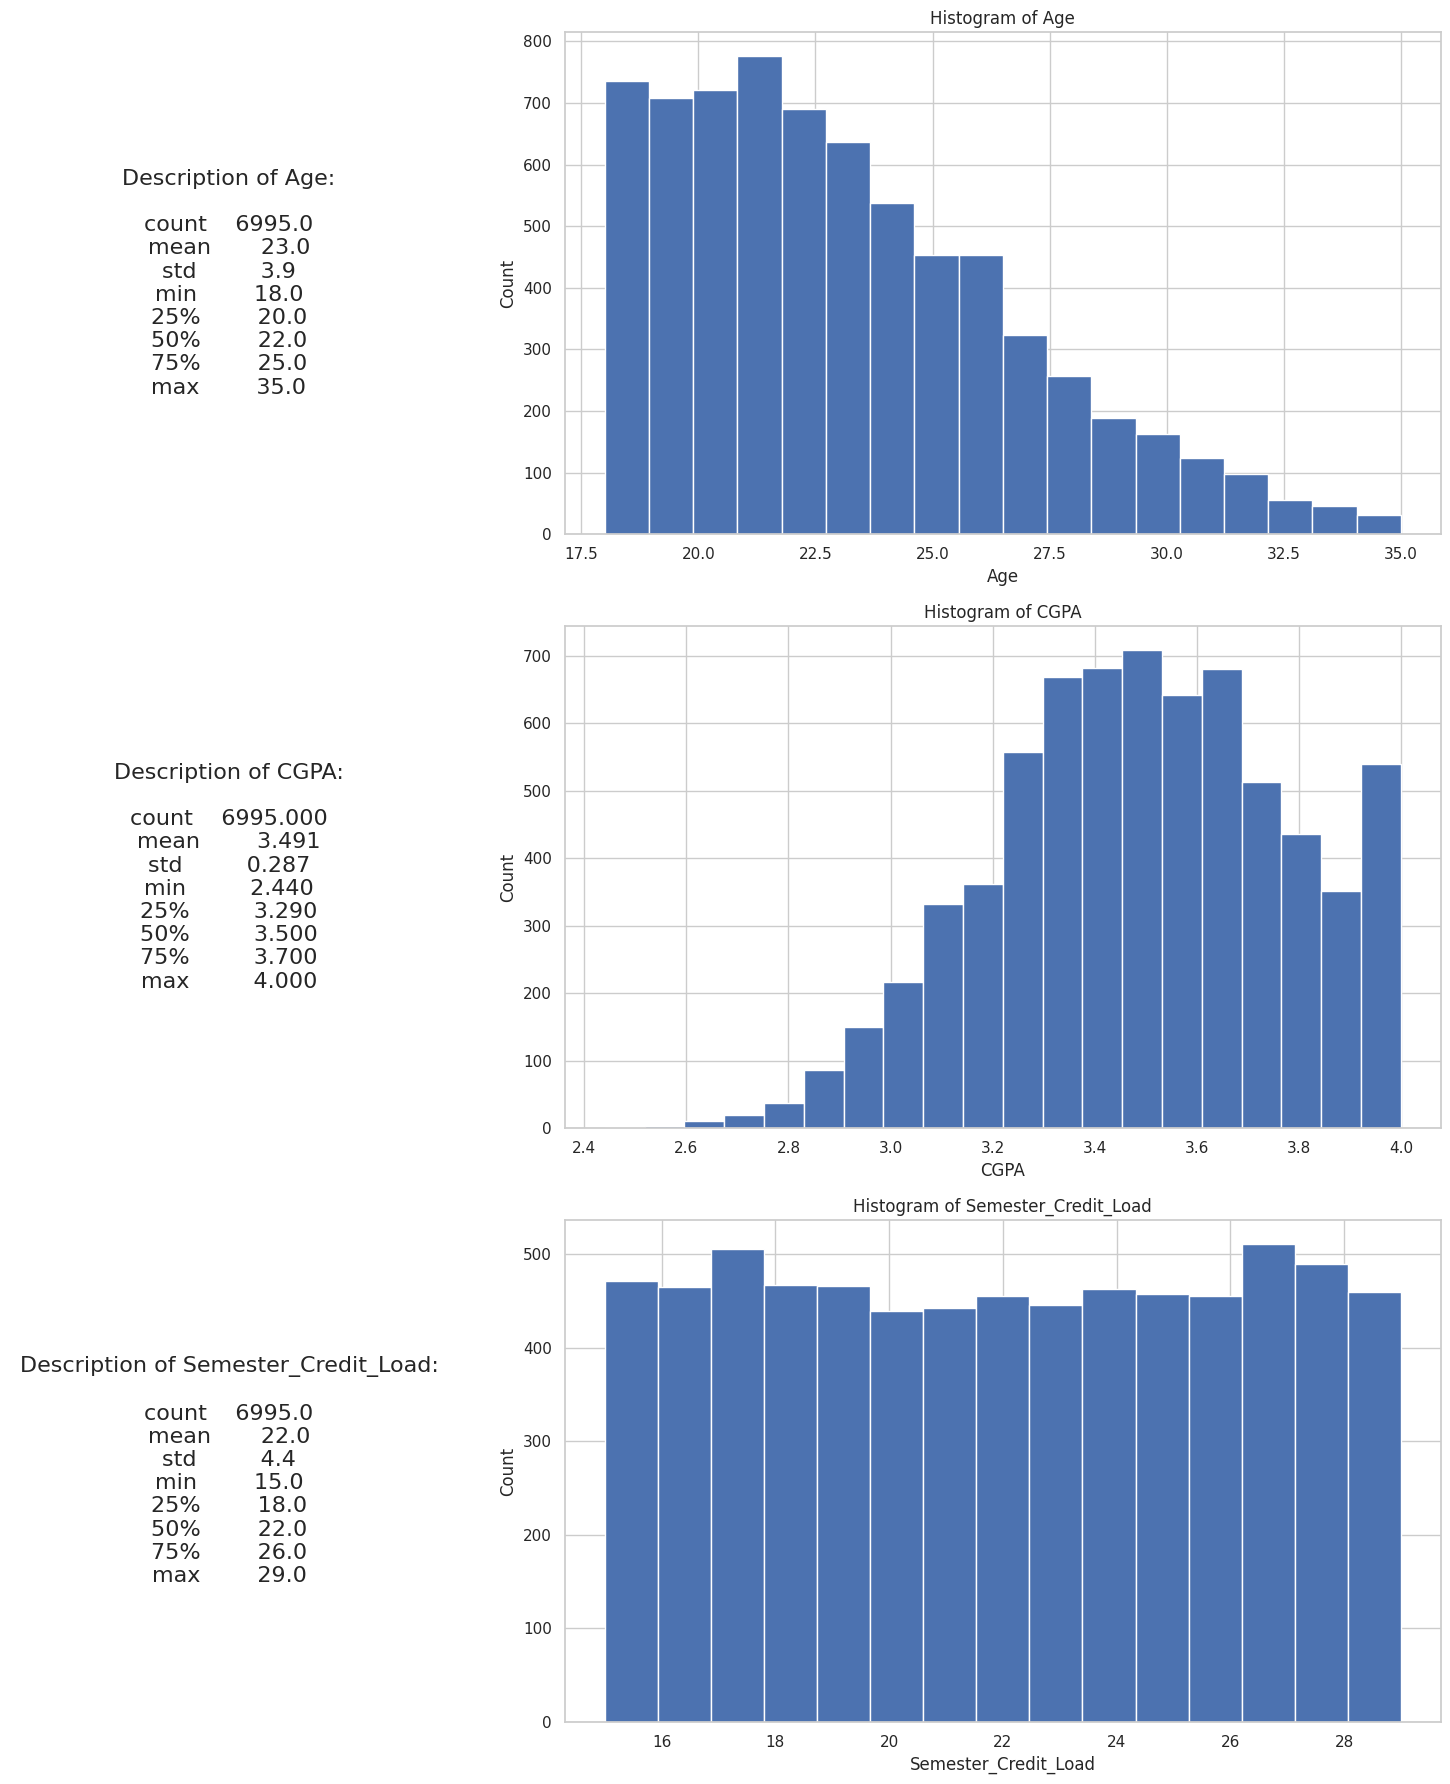

In [25]:
num_cols = 2
num_rows = len(kvantitative_attributes)

# Create a 1x2 grid
fig = plt.figure(figsize=(15, 6*len(kvantitative_attributes)))
gs = gridspec.GridSpec(len(kvantitative_attributes), 2, width_ratios=[1, 2])

# Iterate over the columns to plot
for i, col in enumerate(kvantitative_attributes):
    if col == 'CGPA':
        description = df[col].describe().round(3)
        linspace = 20
    else: 
        linspace = df[col].max()-df[col].min()+1
        description = df[col].describe().round(1)
        
    # Plot description in the first column
    string_title = f"Description of {col}:\n\n" + description.to_string()
    ax0 = plt.subplot(gs[i, 0])
    ax0.text(0.5, 0.5, string_title, 
             horizontalalignment='center', verticalalignment='center', fontsize=16)
    ax0.axis('off')  # Turn off the axis
    
    # Plot histogram in the second column
    ax1 = plt.subplot(gs[i, 1])
    ax1.set_title(f'Histogram of {col}')
    ax1.hist(df[col], bins=linspace, alpha=1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


Pro atribut "Age" (věk) byla zjištěna průměrná střední hodnota 23 let, přičemž z histogramu je vidět, že jsou data pozitivně vychýlená (průměrná hodnota je vyšší než medián a ten je větší než modus, který odpovídá hodnotě 21). Z měr variability dat můžeme vyčíst směrodatnou odchylku, která je rovna hodnotě 3.9, a rozptyl je tedy roven hodnotě 15.21. Mezikvartilové rozpětí je pak rovno hodnotě 5, což znamená, že mezi hodnotami 20 a 25 se nachází padesát procent všech hodnot.

Atribut "CGPA" je jediným atributem nabývajícím desetinných hodnot v této datové sadě. Nabývá hodnot od 2.44 do hodnoty 4.0, přičemž průměrná hodnota je 3.491 a medián je roven 3.5. Z histogramu i dalších měr polohy je vidět, že data jsou negativně vychýlená. CO se týče měr variability, směrodatná odchylka nabývá hodnoty 0.287 a rozptyl tedy přibližně hodnoty 0.0824. Mezikvartilové rozpětí je 0.41 a apadesát procent dat nabývá hodnoty v intervalu 3.29 až 3.7.

Posledním kvantitativním atributem se "Semester_Credit_Load", tedy počet kreditů na semestr. Tento atribut nabývá hodnot od 15 do 29 a jednotlivá data jsou poměrně rovnoměrně rozdělena. Průměrná hodnota se shoduje s mediánem, nabývají hodnoty 22. Nejvíce zastoupen je počet 27 kreditů za semestr, nicméně pouze o pár záznamů méně nabývá hodnoty 17 kreditů. Z histogramu je vidět přibližně rovnoměrné rozložení dat. Mezikvartilové rozpětí je 8, a padesát procent hodnot leží mezi hodnotou 18 a 26.


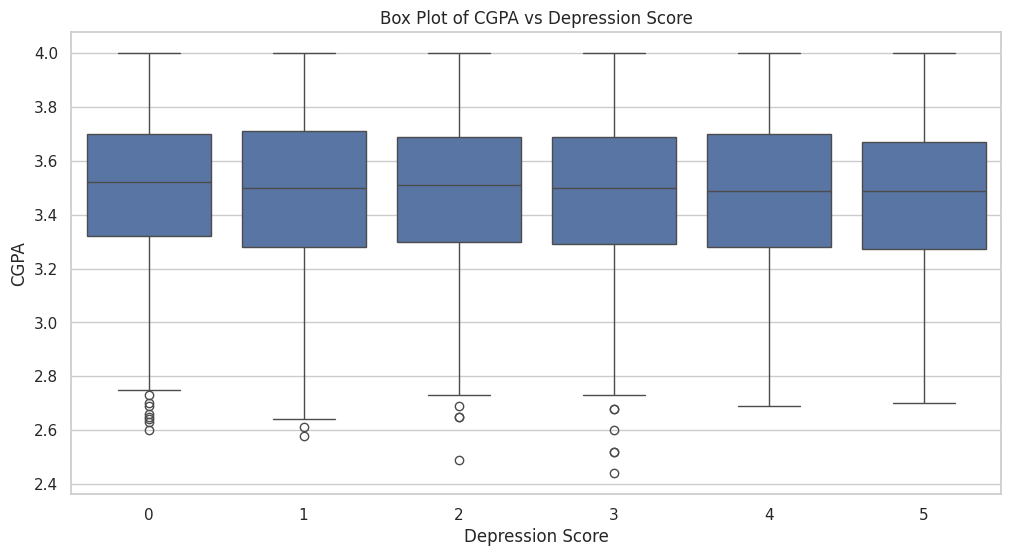

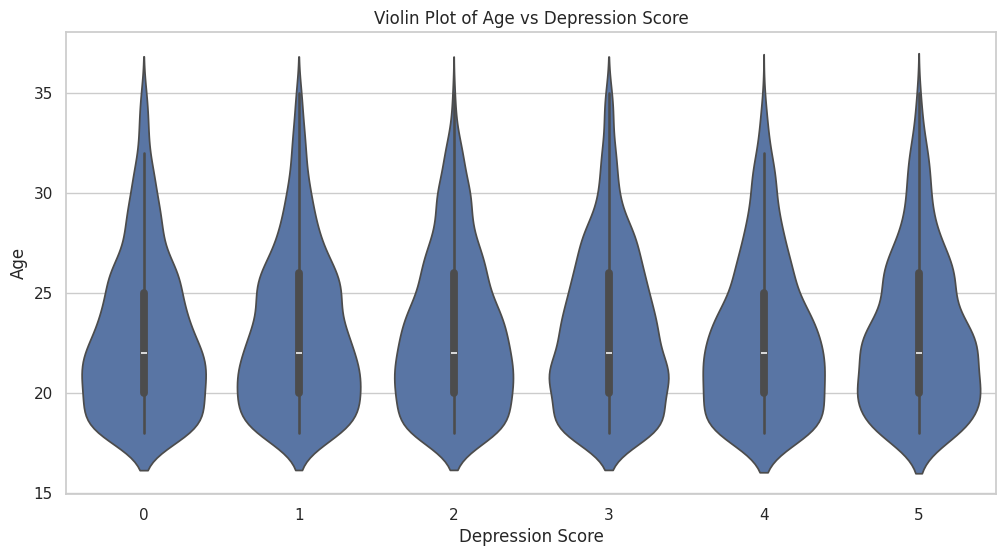

In [9]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depression_Score', y='CGPA', data=df)
plt.title('Box Plot of CGPA vs Depression Score')
plt.xlabel('Depression Score')
plt.ylabel('CGPA')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Depression_Score', y='Age', data=df)
plt.title('Violin Plot of Age vs Depression Score')
plt.xlabel('Depression Score')
plt.ylabel('Age')
plt.show()

Oba naše grafy zobrazují vztah mezi kategorickým a kvantitativním atriutem, kdy se snažíme mapovat Depression Score na CGPA a Age. 

Pro atribut CGPA jsme zvolili krabicový graf, můžeme z něj vyčíst několik zajimavých skutečností: 
- Nejčastěji se deprese vyskytuje u CGPA s nejvetším výskytem.
- Nezáleží na získáných známkách studentů, depression score je přibližně zastoupeno rovnoměrně mezi jednotlivými GGPA. Pokud má CGPA menší zastoupení mezi studenty, poměrově je i méně zastoupená deprese.

Pro atribut Age jsme zvolili houslový graf, který nám poskytuje následující informace: 
- U věku máme podobný trend jako u CGPA vidíme, že věk nemá vliv na depresi a opět je zde poměrově zastoupena úroveň deprese mezi jednolivými věkovými skupinami.
- Zajímavost, kterou nám houslový graf oproti krabicovému přinesl je fakt že, i když je středni hodnota kolem 23 let, tak můžeme vidět, že nejvíce jsou studenti zastoupeni ve věku 18 až 22 let. 

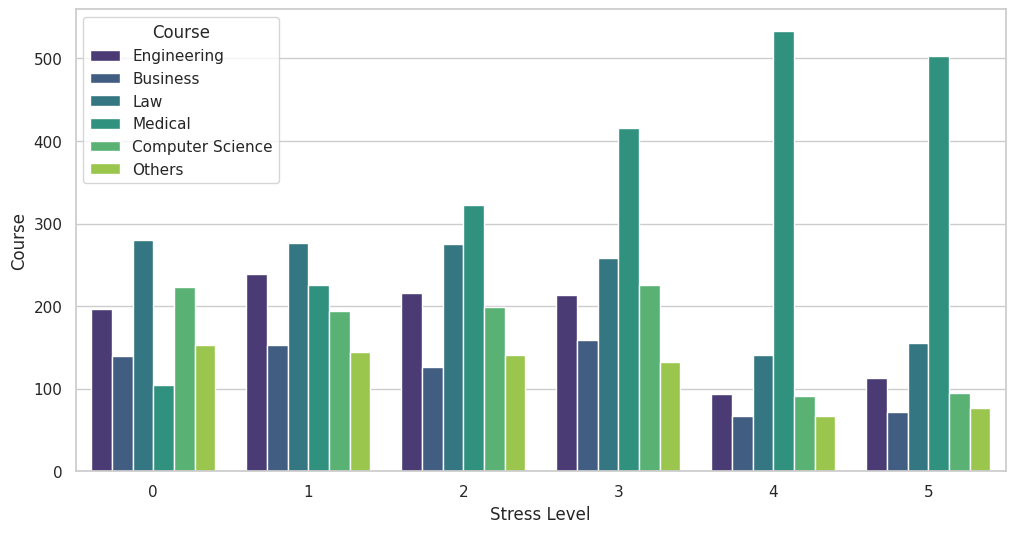

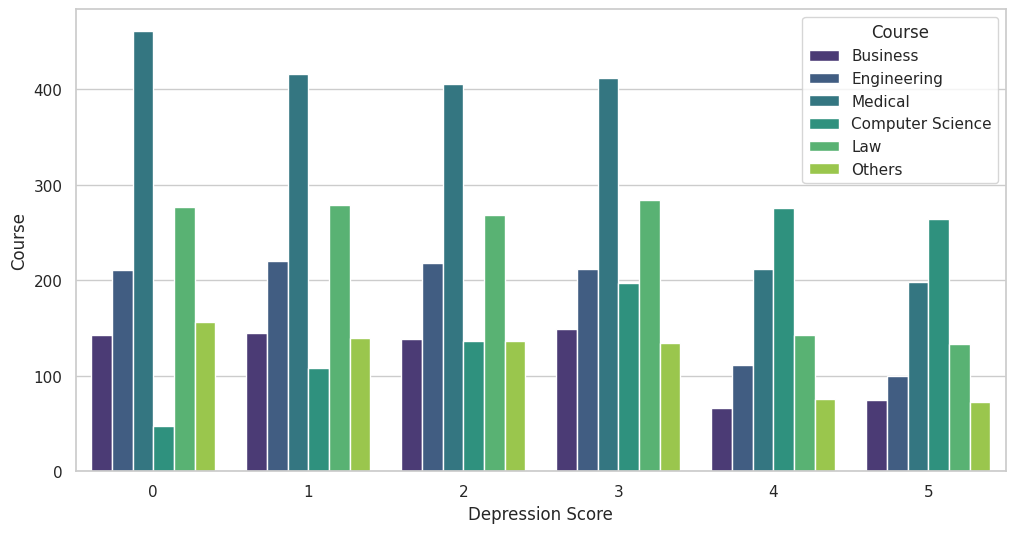

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', hue='Course', data=df, palette='viridis')
plt.xlabel('Stress Level')
plt.ylabel('Course')
plt.legend(title='Course')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Depression_Score', hue='Course', data=df, palette='viridis')
plt.xlabel('Depression Score')
plt.ylabel('Course')
plt.legend(title='Course')
plt.show()

# TODO to scrip 
# plt.figure(figsize=(12, 8));axes = plt.axes(projection="3d");print(type(axes))
# axes.scatter3D(df['Stress_Level'].values, df['Depression_Score'].values, df['Financial_Stress'].values)
# axes.set_xlabel("Stress_Level");axes.set_ylabel("Depression_Score");axes.set_zlabel("Financial_Stress");plt.show()

# plt.figure(figsize=(12, 8));axes = plt.axes(projection="3d");print(type(axes))
# axes.scatter3D(df['CGPA'].values, df['Age'].values, df['Semester_Credit_Load'].values)
# axes.set_xlabel("CGPA");axes.set_ylabel("Age");axes.set_zlabel("Semester_Credit_Load");plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Sleep_Quality', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Relationship_Status', data=df, palette='viridis')
# plt.title('Clustered Bar Chart of Stress Level and Sleep Quality');plt.xlabel('Depression_Score');plt.ylabel('Relationship_Status');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Substance_Use', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Social_Support', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Diet_Quality', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Course', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Gender', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Sleep_Quality', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Relationship_Status', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Substance_Use', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Social_Support', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Diet_Quality', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Physical_Activity', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Course', data=df, palette='hls')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Course', data=df, palette='icefire')
# plt.xlabel('Depression Score');plt.ylabel('Count');plt.legend(title='Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Course', data=df, palette='Spectral')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Depression_Score', hue='Gender', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Sleep_Quality', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Relationship_Status', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Substance_Use', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Social_Support', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Physical_Activity', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='hls')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='icefire')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show();

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Course', data=df, palette='Spectral')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

# plt.figure(figsize=(12, 6));sns.countplot(x='Anxiety_Score', hue='Gender', data=df, palette='viridis')
# plt.xlabel('Stress Level');plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()


Zjistili jsme, že je největší vliv na atribut Stress Level má atribut Course. Můžeme jasně vidět, že studenti medicíny maji v poměru zaručeně největší stres a studenti Computer Science mají zase poměrově největší pravděpodobnost k depresím. 

<Figure size 1200x800 with 0 Axes>

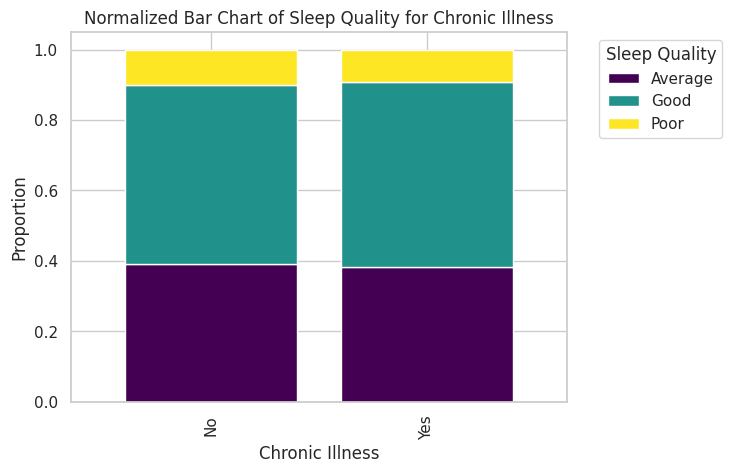

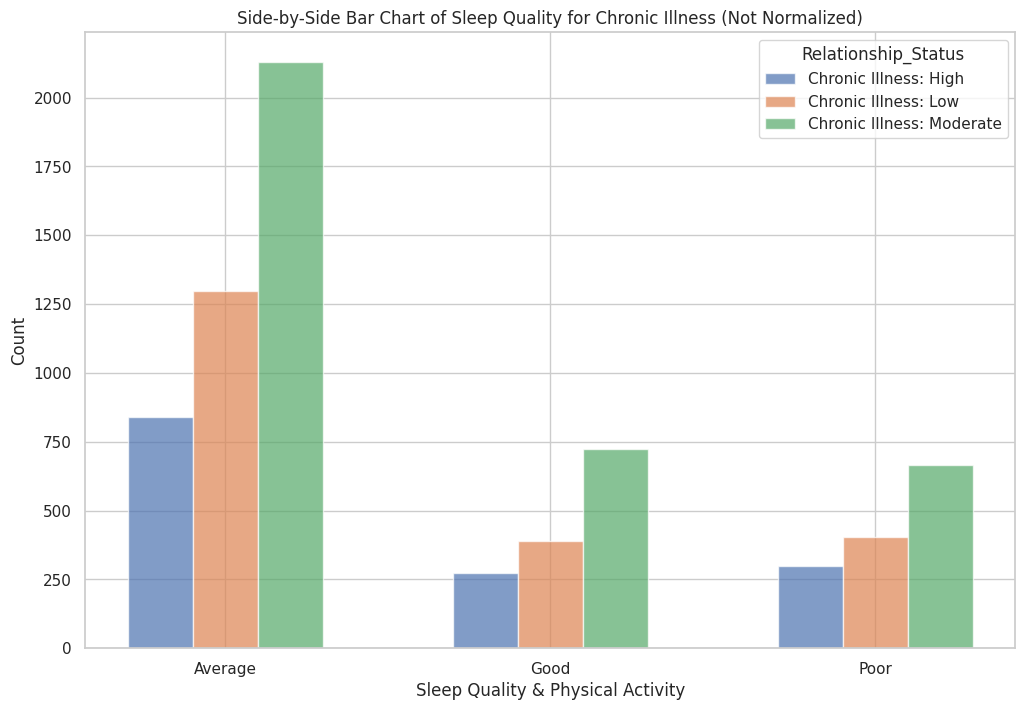

In [11]:
normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
plt.figure(figsize=(12, 8))
normalized_counts.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
plt.title('Normalized Bar Chart of Sleep Quality for Chronic Illness')
plt.xlabel('Chronic Illness');plt.ylabel('Proportion')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Age, Course, Gender, CGPA, Stress_Level, Anxiety_Score, Sleep_Quality, Physical_Activity, Diet_Quality,
# Social_Support, Relationship_Status, Substance_Use, Counseling_Service_Use, Family_History, 
# Chronic_Illness, Financial_Stress, Extracurricular_Involvement, Semester_Credit_Load, Residence_Type

counts = df.groupby(['Physical_Activity', 'Diet_Quality']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8));x_positions = np.arange(len(counts.columns))

for i, status in enumerate(counts.index):
    plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)')
plt.xlabel('Sleep Quality & Physical Activity');plt.ylabel('Count');plt.xticks(x_positions + 0.2, counts.columns)  
plt.legend(title='Relationship_Status');plt.show()



# normalized_counts = df.groupby(['Physical_Activity', 'Relationship_Status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
# plt.figure(figsize=(12, 8))
# x_positions = np.arange(len(normalized_counts.columns))
# for i, status in enumerate(normalized_counts.index):
#     plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

# plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness')
# plt.xlabel('Sleep Quality');plt.ylabel('Proportion');plt.xticks(x_positions + 0.2, normalized_counts.columns)  # Set x-axis ticks
# plt.legend(title='Relationship_Status');plt.show()

# TODO to script 
#plt.figure(figsize=(12, 8));plt.hist(df[df['Chronic_Illness'] == 'Yes']['Sleep_Quality'], alpha=0.5, label='Chronic Illness: Yes', density=True)
#plt.hist(df[df['Chronic_Illness'] == 'No']['Sleep_Quality'], alpha=0.5, label='Chronic Illness: No', density=True);plt.title('Normalized Histograms of Sleep Quality for Chronic Illness');plt.xlabel('Sleep Quality');plt.ylabel('Density');plt.legend();plt.show()

# Create a DataFrame with normalized counts
# normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
# plt.figure(figsize=(12, 8))

# Iterate over 'Chronic_Illness' values
# for status in normalized_counts.index:
#    plt.bar(normalized_counts.columns, normalized_counts.loc[status], label=f'Chronic Illness: {status}', alpha=0.7)

# plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness');plt.xlabel('Sleep Quality')
# plt.ylabel('Proportion');plt.legend(title='Chronic Illness');plt.show()

#counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0);plt.figure(figsize=(12, 8));x_positions = np.arange(len(counts.columns))

#for i, status in enumerate(counts.index):
#    plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

#plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)');plt.xlabel('Sleep Quality');plt.ylabel('Count')
#plt.xticks(x_positions + 0.2, counts.columns) ;plt.legend(title='Chronic Illness');plt.show()

#normalized_counts = df.groupby(['Chronic_Illness', 'Sleep_Quality']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
#plt.figure(figsize=(12, 8))
#x_positions = np.arange(len(normalized_counts.columns))

#for i, status in enumerate(normalized_counts.index):
#    plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)

# counts = df.groupby(['Relationship_Status', 'Age']).size().unstack(fill_value=0)
# plt.figure(figsize=(12, 8));x_positions = np.arange(len(counts.columns))
# for i, status in enumerate(counts.index):
#     plt.bar(x_positions + i * 0.2, counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)
# plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness (Not Normalized)');plt.xlabel('Age')
# plt.ylabel('Count');plt.xticks(x_positions + 0.2, counts.columns);plt.legend(title='Relationship_Status');plt.show()

# normalized_counts = df.groupby(['Relationship_Status', 'Age']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
# plt.figure(figsize=(12, 8))
# x_positions = np.arange(len(normalized_counts.columns))
# for i, status in enumerate(normalized_counts.index):
#     plt.bar(x_positions + i * 0.2, normalized_counts.loc[status], width=0.2, label=f'Chronic Illness: {status}', alpha=0.7)
# plt.title('Side-by-Side Bar Chart of Sleep Quality for Chronic Illness');plt.xlabel('Age')
# plt.ylabel('Proportion');plt.xticks(x_positions + 0.2, normalized_counts.columns);plt.legend(title='Relationship_Status');plt.show()

#plt.figure(figsize=(12, 6))
#sns.countplot(x='Course', hue='Gender', data=df, palette='viridis')
#plt.title('Clustered Bar Chart of Gender and Course')
#plt.xlabel('Course');plt.ylabel('Count');plt.legend(title='Gender');plt.show()


#plt.figure(figsize=(12, 6));sns.countplot(x='Family_History', hue='Course', data=df, palette='viridis')
#plt.title('Clustered Bar Chart of Gender and Course');plt.xlabel('Family History')
#plt.ylabel('Count');plt.legend(title='Sleep Quality');plt.show()

#normalized_data = df.groupby(['Family_History', 'Course']).size() / df.groupby(['Family_History']).size()
#normalized_data = normalized_data.reset_index(name='Proportion')

#plt.figure(figsize=(12, 6));ns.barplot(x='Family_History', y='Proportion', hue='Course', data=normalized_data, palette='viridis')
#plt.title('Clustered Bar Chart of Family History, Course, Sleep Quality, and Physical Activity')
#plt.xlabel('Family History');plt.ylabel('Proportion');plt.legend(title='Course');plt.show()

# plt.figure(figsize=(10, 6));sns.boxplot(x='Gender', y='CGPA', hue='Sleep_Quality', data=df, palette='pastel')
# plt.title('Box Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('CGPA');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='CGPA', hue='Gender', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('CGPA');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='CGPA', hue='Course', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('CGPA');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='CGPA', hue='Residence_Type', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('CGPA');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='Age', hue='Gender', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('Age');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='Age', hue='Course', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('Age');plt.show()

# plt.figure(figsize=(10, 6));sns.violinplot(x='Age', hue='Relationship_Status', data=df, palette='pastel')
# plt.title('Violin Plot of CGPA by Gender');plt.xlabel('Gender');plt.ylabel('Age');plt.show()

- Zajímavá je skutečnost, že ačkoliv by se zdálo, že kvalita spánku bude mít vliv na chronické onemocnění, tak můžeme vidět, že naše kvalita spánku nedefinuje to, jak často mívají studenti chronické onemocnění. Pro všechny atributy jsme zjistili, že neexistuje nějaký atribut, který bý zásadně ovlivnil výskyt chronické nemoci.

- Dále jsme porovnali veškeré dvojice atributů a opět jsme zjistili, že žádná dvojice atributů nijak neovlivňuje výskyt chronické nemoci, což můžeme vidět na našem grafu, kde jsme porovnávali dobrý spánek a fyzickou aktivitu s výskytem chronického onemocnění.

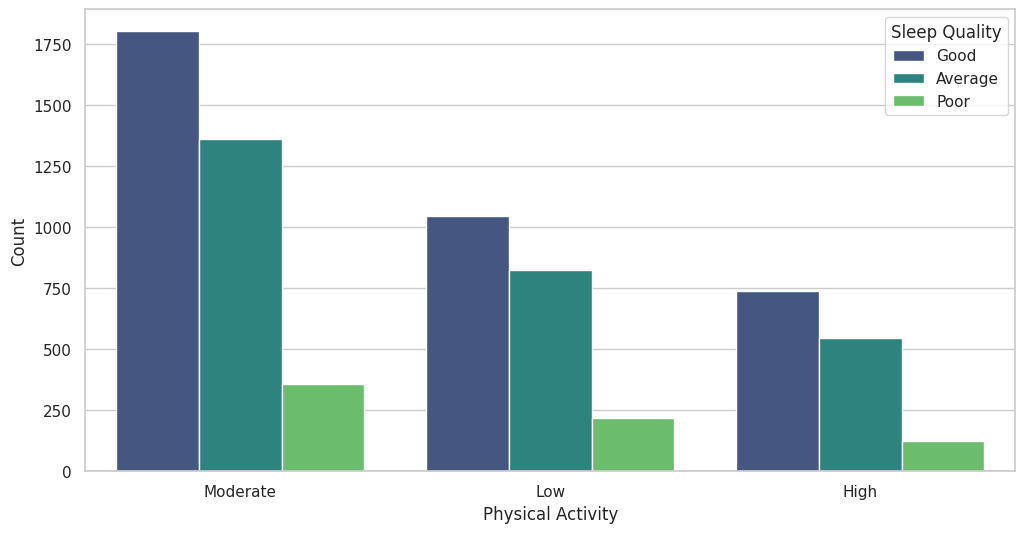

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical_Activity', hue='Sleep_Quality', data=df, palette='viridis')
plt.xlabel('Physical Activity');plt.ylabel('Count')
plt.legend(title='Sleep Quality');plt.show()

- Můžeme vidět poměrově menší skok mezi kvalitami spánku u lidí s vysokou a nízkou fyzickou aktivitou, kdy špatný spánek má u náročné fyzické aktivity asi o polovinu více lidí, u dobrého spánku je tento asi jen 25%. Z čehož můžeme konstatovat, že lidi s vyšší fyzickou zátěží mají menší pravděpodobnost nekvalitního spánku a větší pravděpodobnost kvalitního spánku. 

### Detekce odlehlých hodnot

Pro identifikazi odlehlých hodnot v datové sadě byla provedena analýza popiských statistik a histogramů jednotlivých atributů. Průměrné hodnoty, mediány a ostatní popisné statistiky (viz podkapitola ...) odpovídají očekávání a neposkytují tedy důvody ke zvážení odstranění nebo transformace některých těchto hodnot jakožto odlehlých. V histogramech by se pak dále odlehlé hodnoty projevily jako extrémní hodnoty, které se výrazně liší od většiny ostatních hodnot a nabývají neočekávaných hodnot. Opět, po důkladném prozkoumání histogramů jednotlivých atributů z podkapitoly nebyly žádné takové hodnoty detekovány.

### Analýza chybějících hodnot

In [13]:
# Print the number of missing values in each column
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Number of missing values in each column:")
print(columns_with_missing_values)

# Identify rows with missing values in all of the columns with at least one missing value
# rows_with_missing_values = df[df[columns_with_missing_values.index].isnull().all(axis=1)]
rows_with_missing_values = df[df['CGPA'].isnull() & df['Substance_Use'].isnull()]

# Print the number of rows with missing values in all of the specified columns
num_rows_with_missing_values = len(rows_with_missing_values)
print(f"\nNumber of rows with missing values in all of the specified columns: {num_rows_with_missing_values}")

Number of missing values in each column:
CGPA             12
Substance_Use    15
dtype: int64

Number of rows with missing values in all of the specified columns: 0


Během analýzy dat jsme identifikovali dva atributy obsahující chybějící hodnoty: CGPA a Substance_Use. Atribut CGPA je typu float a obsahuje 19 chybějících hodnot, zatímco atribut Substance_Use, který je kategorický, obsahuje 15 chybějících hodnot.

Jak je vidět, v datové sadě není ani jeden záznam, u kterého by chyběla hodnota více atributů než jednoho. 

Strategie pro Chybějící Hodnoty
1. Atribut CGPA
Vzhledem k nízkému počtu chybějících hodnot v atributu CGPA (19 záznamů ze 7000+) a faktu, že tento atribut obsahuje hodnoty typu float, máme několik možností:

Doplnění Průměrnou Hodnotou: Chybějící hodnoty lze doplnit průměrnou hodnotou atributu CGPA.
Doplnění Mediánem: Další možností je doplnit chybějící hodnoty mediánem tohoto atributu.
2. Atribut Substance_Use
Pro atribut Substance_Use, který je kategorický, lze chybějící hodnoty doplnit nejčastěji se vyskytující kategorií, tj. modou. Další možností může být vytvoření nové kategorie pro chybějící hodnoty.

### Korelační analýza

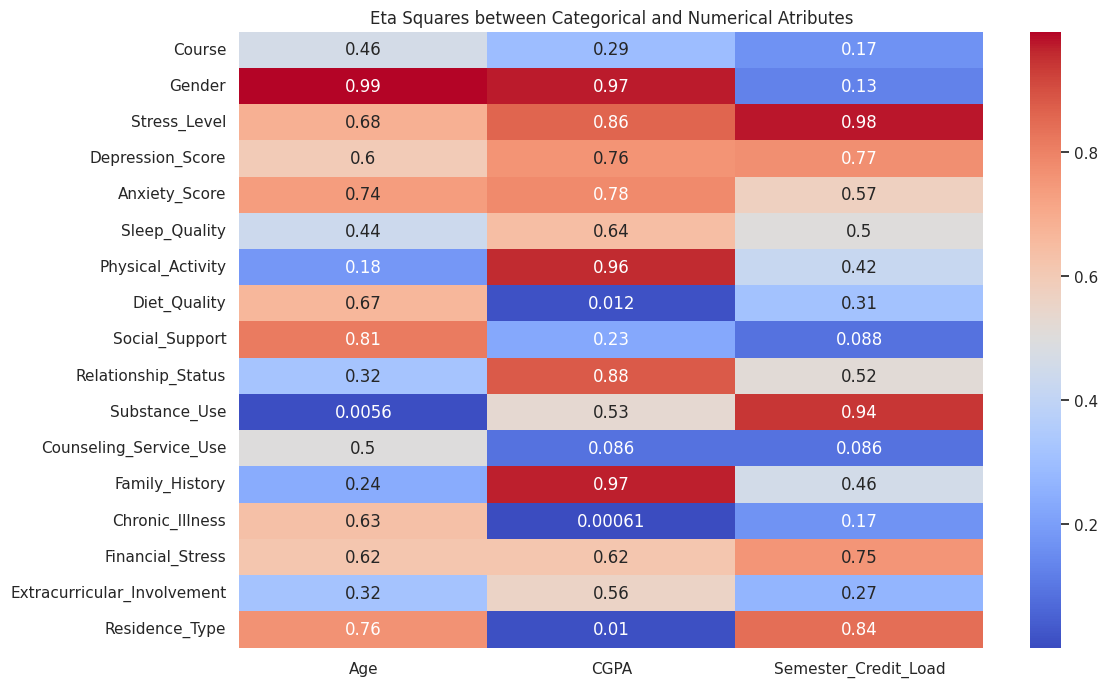

In [14]:
from sklearn.feature_selection import f_classif

df = df.dropna()

def eta_squared(X, y):
    anova = f_classif(X, y)
    eta_sq = anova[0] / (anova[0] + anova[1])
    return eta_sq

numerical_attributes = kvantitative_attributes   

#print(categorical_attributes)
#print(numerical_attributes)
eta_squared_results = pd.DataFrame(index=categorical_attributes, columns=numerical_attributes)

for cat_col in categorical_attributes:
    for num_col in numerical_attributes:
        eta_sq = eta_squared(df[[num_col]], df[cat_col])
        eta_squared_results.loc[cat_col, num_col] = eta_sq[0]

plt.figure(figsize=(12, 8))
sns.heatmap(eta_squared_results.astype(float), annot=True, cmap='coolwarm')
plt.title('Eta Squares between Categorical and Numerical Atributes')
plt.show()


Vytvořili jsme si korelční matici mezi kategorickými a kvantitativními atributy. Můžeme vidět, že se zde objevují různé záporné či kladné korelace, kde kladne vyjadřujeme teplejší barvou a pozitivním číslem a to pomocí metody F-test. 

Mezi zajímavé a velice silné korelace patří: 
- Gender a CGPA
- Physical Activity a CGPA
- Substance Use a Semester Credit Load
- Family History a CGPA

Je velice užitečná informace, že fyzická aktivia ovlivňuje naše známky. A naopak pozoruhodná informace, kterou tolik nemůžeme ovlivnit je, že rodiná historie, nebo gender ovlivňuje naše známky. 

Další zajímavost je, že úživání drog většinou znamená větší kreditovou zátěž studenta. 

Naopak podivné korelace:
- Věk a pohlaví

můžeme spekulovat, že zastoupení, jednoho pohlaví není dostatečně rozdistribuováno napříč věku.

<Figure size 1000x600 with 0 Axes>

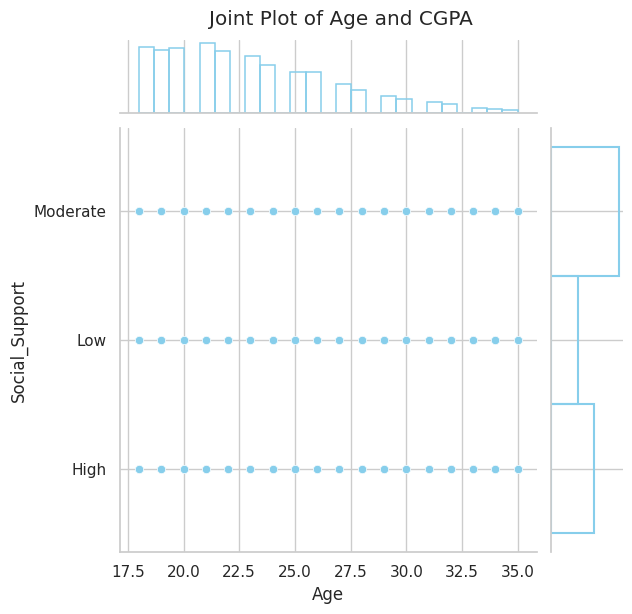

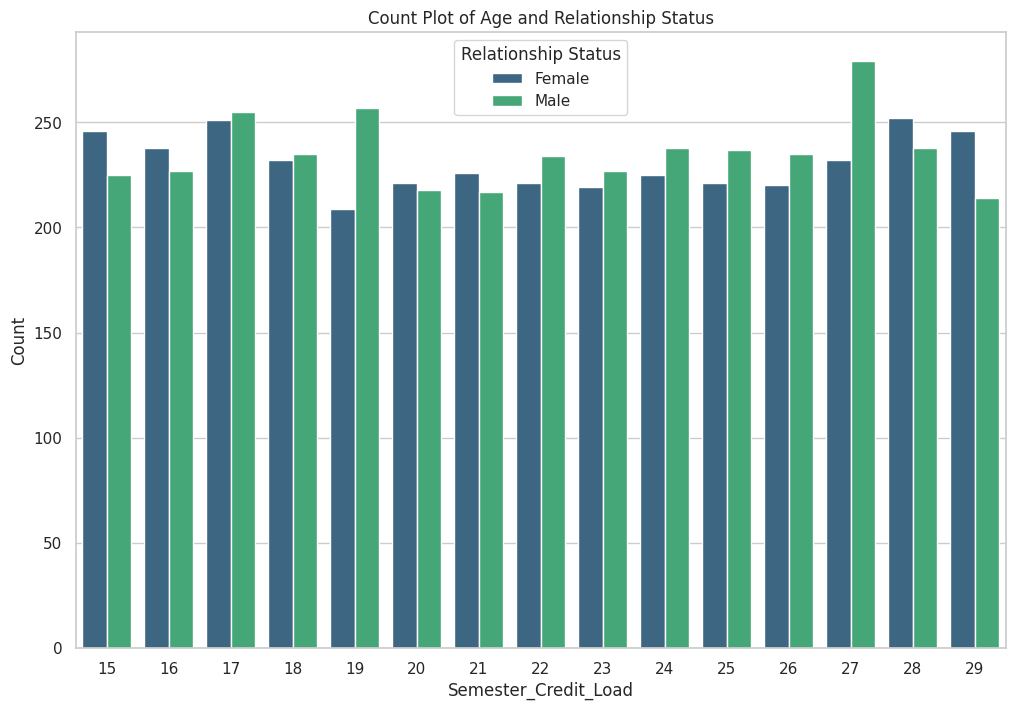

In [15]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='Social_Support', data=df, kind='scatter', marginal_kws=dict(bins=25, fill=False), color='skyblue')
plt.suptitle('Joint Plot of Age and CGPA', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Semester_Credit_Load', hue='Gender', data=df, palette='viridis')
plt.title('Count Plot of Age and Relationship Status')
plt.xlabel('Semester_Credit_Load')
plt.ylabel('Count')
plt.legend(title='Relationship Status')
plt.show()

# plt.figure(figsize=(12, 8))
# sns.countplot(x='Age', hue='Social_Support', data=df, palette='viridis')
# plt.title('Clustered Bar Chart of Category1 and Category2')
# plt.xlabel('Category1')
# plt.ylabel('Count')
# plt.legend(title='Category2')
# plt.show()


Na těchto grafech jsme se pokusili najít korelaci mezi kvantitativními atributy. 

Korelace 
- Age a CGPA - vidíme, že zde žádná korelace není.
- Semester_Credit_Load a Gender - vidíme, že zde nacházíme určité korelace, například kredity 19 a 27 mají vyší pravděpodobnost u můžů na druhou stranu bychom z toho neměli nějaký závěr, jelikož muží mohou být více zastoupení na oboru, kde je tohle ideální kreditový průchod. 

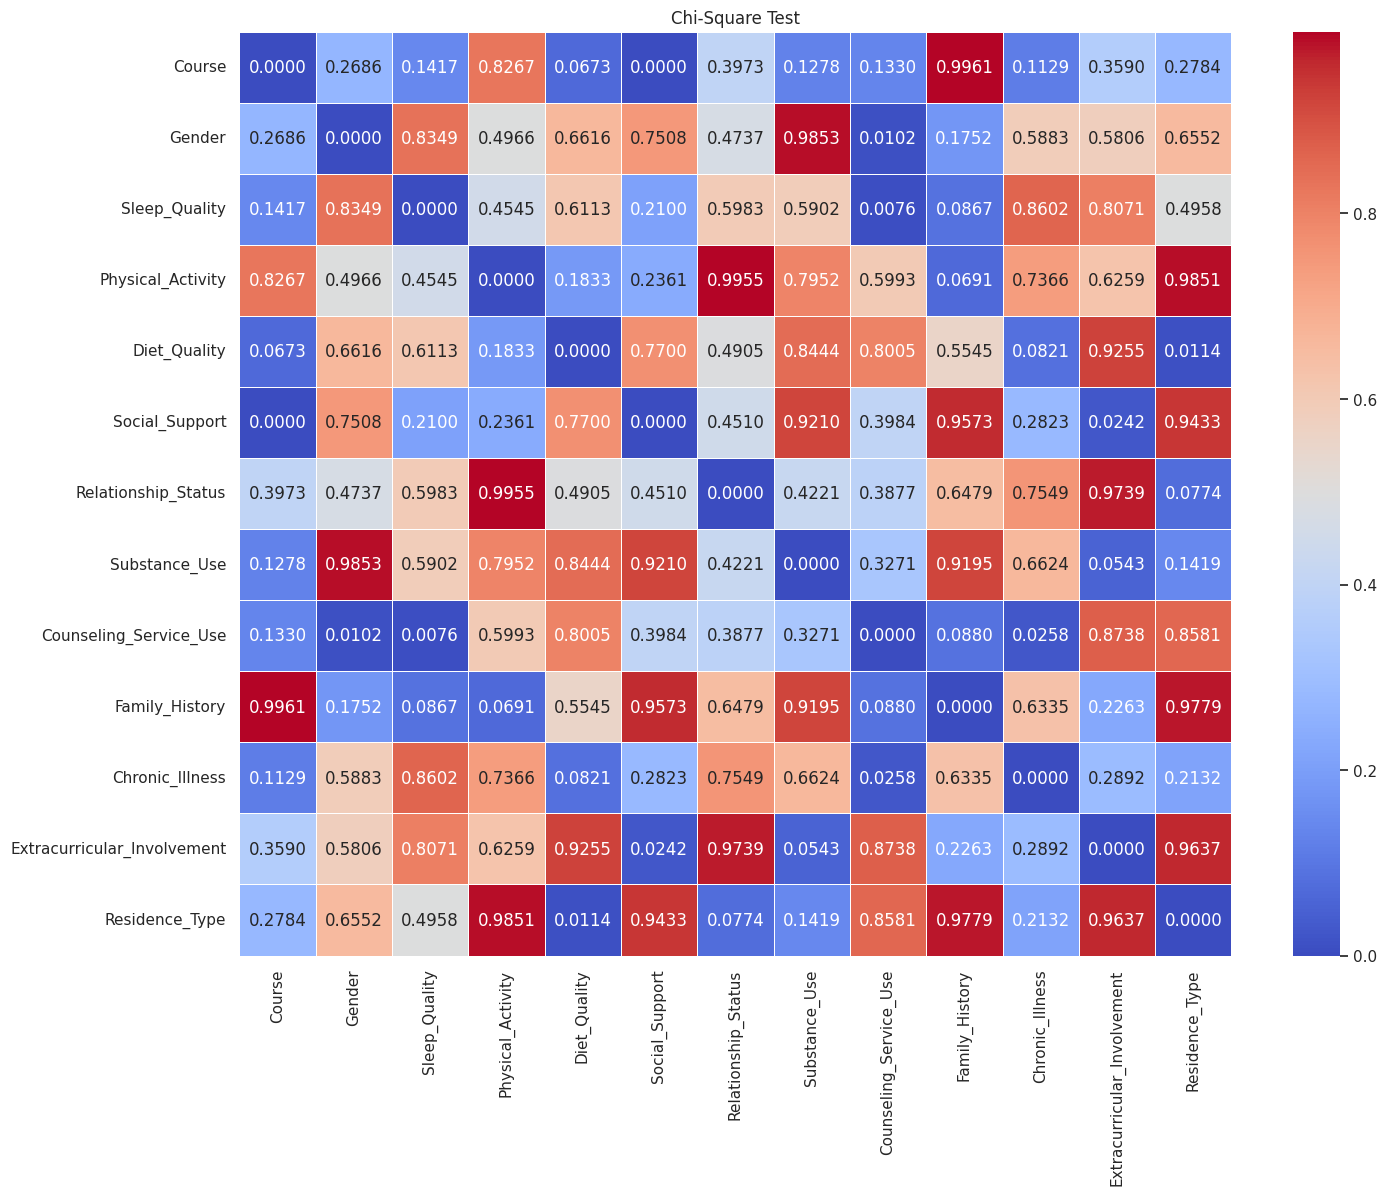

In [16]:
from scipy.stats import chi2_contingency

categorical_attributes = df.select_dtypes(include=['object']).columns

p_values_df = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

for col1 in categorical_attributes:
    for col2 in categorical_attributes:
        contingency_table = pd.crosstab(df[col1], df[col2])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        p_values_df.loc[col1, col2] = p_value

p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(16, 12))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Chi-Square Test')
plt.show()


Opět jsme si udělali korelační matici, tentokrát však mezi kategoryckými atributy pomocí testu dobré shody. 

Vidime zde spoustu zajimavých korelací ať už pozitivních či negativních. 

Jedna korelace, která stojí za zmínku je, že rodiná historie ovlivňuje ubytování, braní drog, obor a samozřejmě podporu od rodiny. Máme li špatný rodiný můžeme spekulovat, že máme méně peněz a studujeme finančně méně náročné školy v horším ubytování a je větší šance, že bereme drogy. 

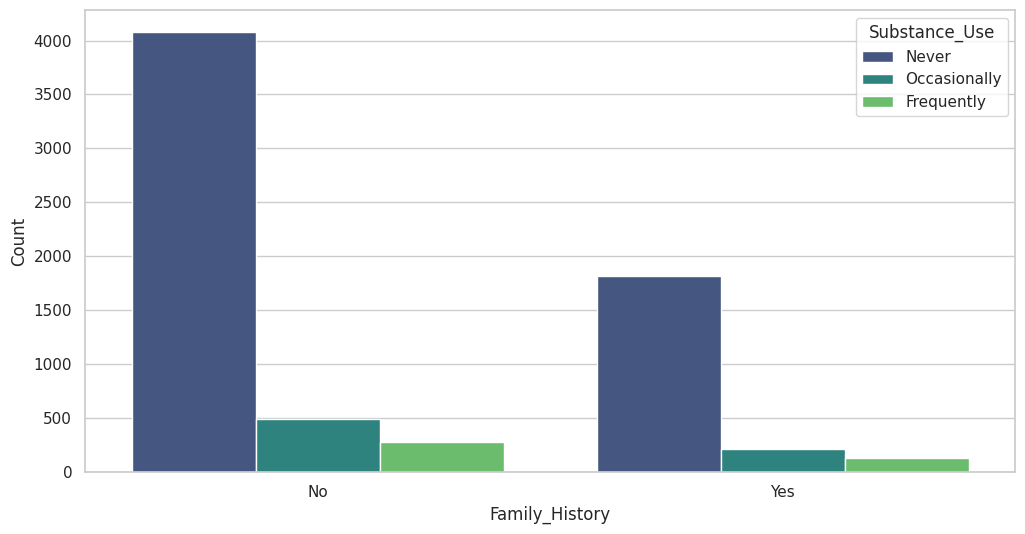

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Family_History', hue='Substance_Use', data=df, palette='viridis')
plt.xlabel('Family_History');plt.ylabel('Count')
plt.legend(title='Substance_Use');plt.show()


# plt.figure(figsize=(12, 6))
# sns.countplot(x='Physical_Activity', hue='Substance_Use', data=df, palette='viridis')
# plt.title('Clustered Bar Chart of Gender and Course')
# plt.xlabel('Physical_Activity')
# plt.ylabel('Count')
# plt.legend(title='Substance_Use')
# plt.show()

# normalized_data = df.groupby(['Physical_Activity', 'Substance_Use']).size() / df.groupby(['Physical_Activity']).size()

# # Reshape the data to create a DataFrame suitable for Seaborn
# normalized_data = normalized_data.reset_index(name='Proportion')

# # Sleep Quality and Physical Activity
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Physical_Activity', y='Proportion', hue='Substance_Use', data=normalized_data, palette='viridis')
# plt.title('Clustered Bar Chart of Family History, Course, Sleep Quality, and Physical Activity')
# plt.xlabel('Physical_Activity')
# plt.ylabel('Proportion'
# plt.legend(title='Substance_Use')
# plt.show()

Korelace mezi rodinou historií a užíváním drog je velmi silná, i když se to na první pohled nemusí zdát tak, ale můžeme vidět, že pokud člověk má dobrou rodinou historii (No), tak má mnohem větší pravděpodobnost na to, že drogy nikdy nebere. 

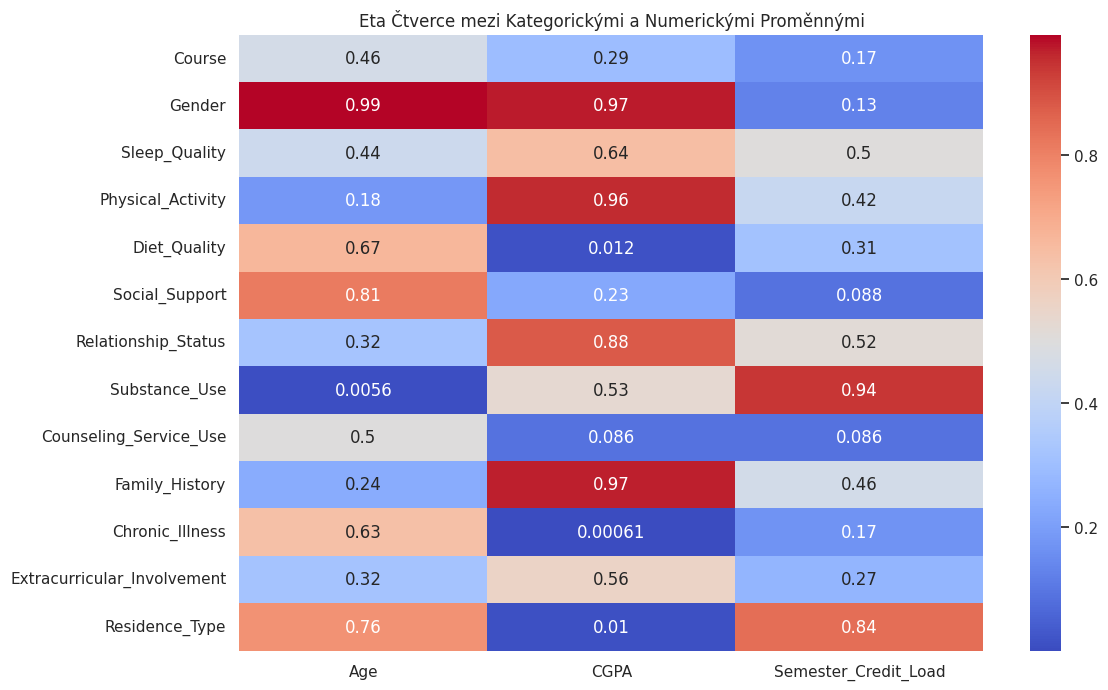

In [18]:
from sklearn.feature_selection import f_classif

df = df.dropna()

def eta_squared(X, y):
    """ Výpočet Eta čtverce pro vztah mezi kategorickou a numerickou proměnnou. """
    anova = f_classif(X, y)
    eta_sq = anova[0] / (anova[0] + anova[1])
    return eta_sq

# categorical_cols = df.select_dtypes(include=['object']).columns
# # Výběr numerických sloupců
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Vytvoření DataFrame pro výsledky Eta čtverce
eta_squared_results = pd.DataFrame(index=categorical_attributes, columns=numerical_attributes)

# Výpočet Eta čtverce pro každou kombinaci kategorických a numerických sloupců
for cat_col in categorical_attributes:
    for num_col in numerical_attributes:
        eta_sq = eta_squared(df[[num_col]], df[cat_col])
        eta_squared_results.loc[cat_col, num_col] = eta_sq[0]

# Vizualizace výsledků
plt.figure(figsize=(12, 8))
sns.heatmap(eta_squared_results.astype(float), annot=True, cmap='coolwarm')
plt.title('Eta Čtverce mezi Kategorickými a Numerickými Proměnnými')
plt.show()

Metodou eta čtverce jsme našli téměř podobné korelace jako metodou F-test, popsanou výše.


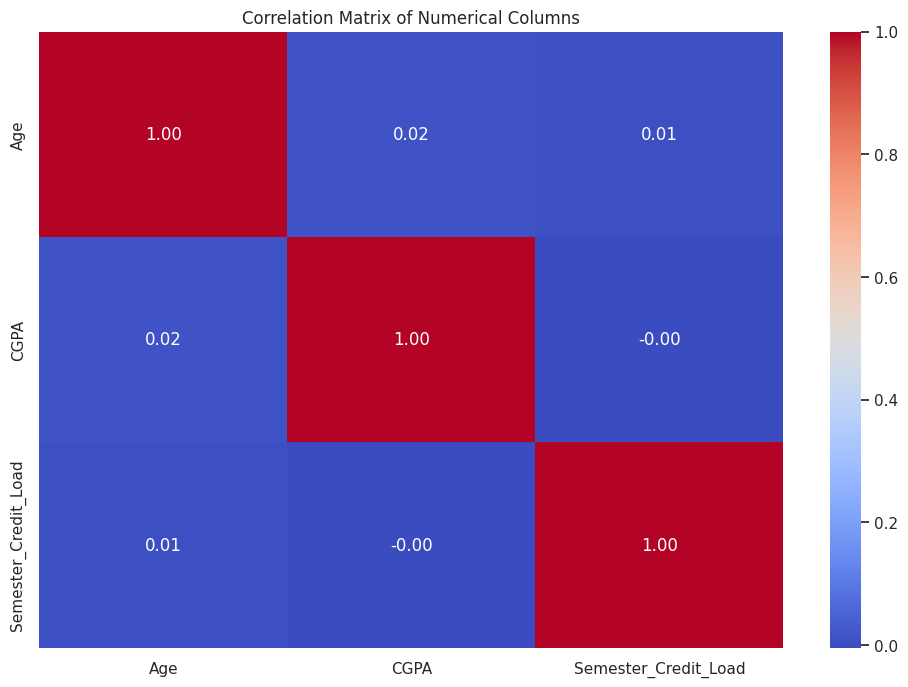

In [19]:
# Selecting numerical columns for correlation analysis
numerical_data = df[kvantitative_attributes]

# Calculating the correlation matrix
# Pearson (kvantitative attributes)
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

Zde jsme ještě provedli korelační matici pro kvantitativní atributy, pomocí Pearsonovy metody, kde lze vidět, že mezi jednotlivými atributy není téměř žádná korelace. 

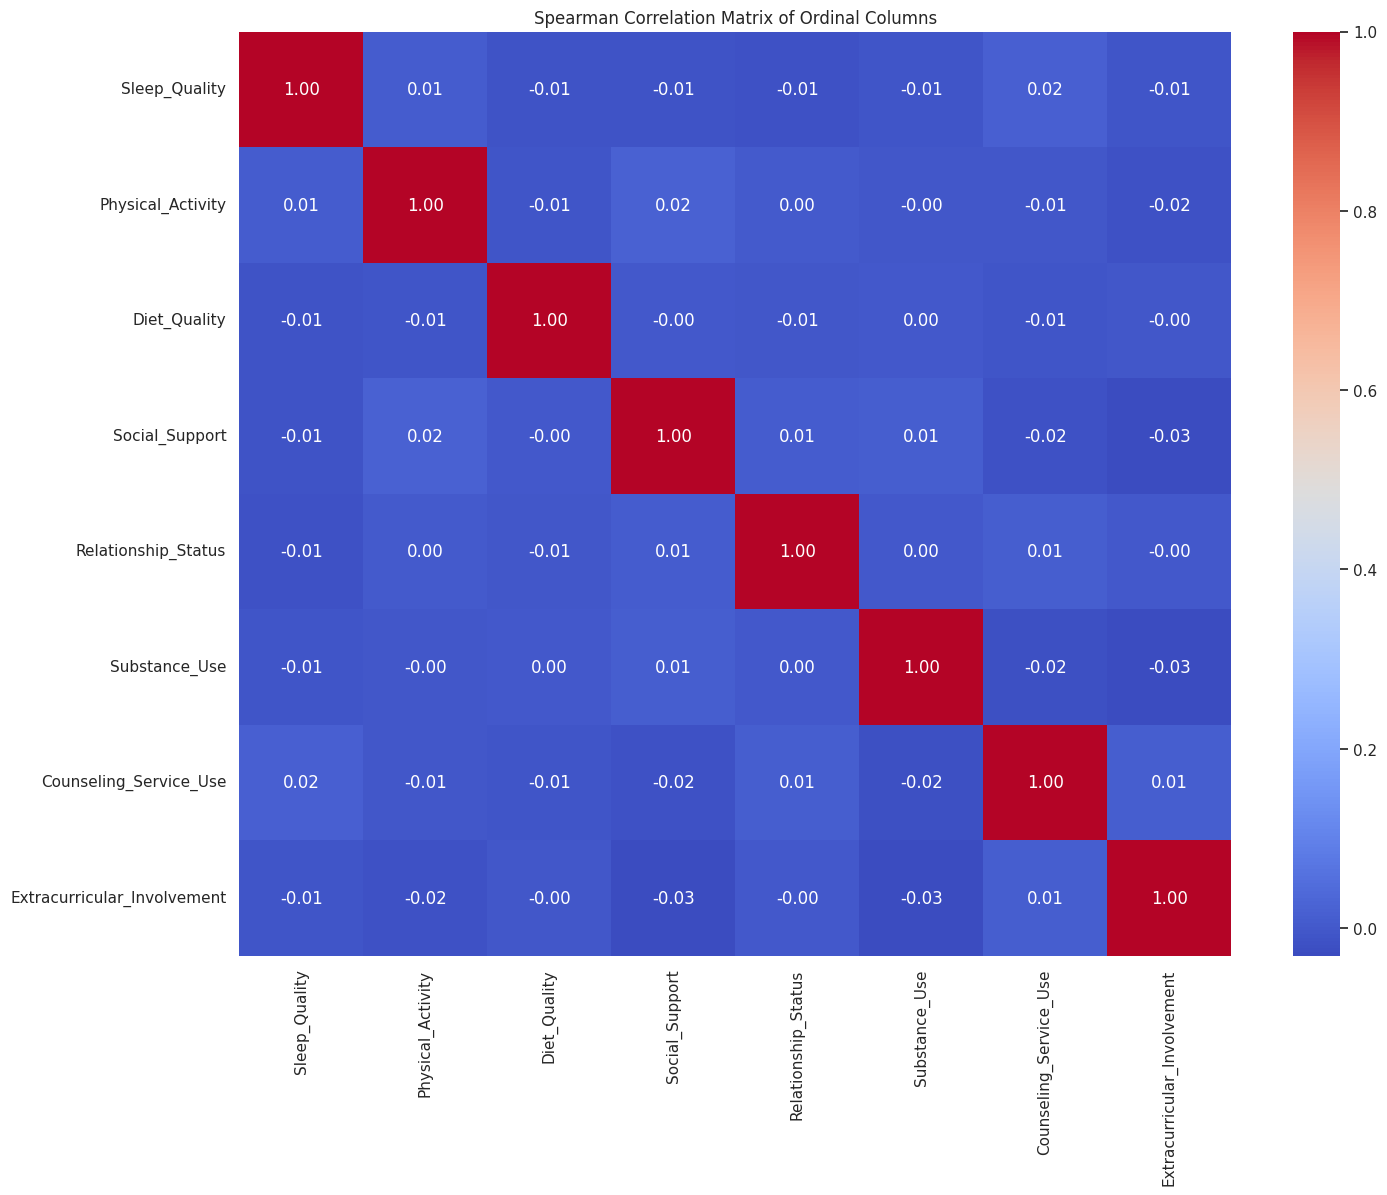

In [20]:
# Selecting only the columns that can be considered as ordinal
ordinal_columns = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 
                   'Social_Support', 'Relationship_Status', 'Substance_Use', 
                   'Counseling_Service_Use', 'Extracurricular_Involvement']

# Encoding the ordinal columns as numerical values for correlation analysis
# Assuming the levels in the ordinal columns have a natural order
ordinal_data = df[ordinal_columns].apply(lambda x: x.astype("category").cat.codes)

# Calculating Spearman correlation matrix for the ordinal columns
spearman_correlation_matrix = ordinal_data.corr(method='spearman')
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Matrix of Ordinal Columns")
plt.show()

Vyzkoušeli jsme ještě metodu Spearmana pro nalezení korelace mezi kategorickými atributy. Můžeme vidět, že metoda Spearmana nám příliš nefungovala pro nalezení korelací mezi kategorickými atributy.



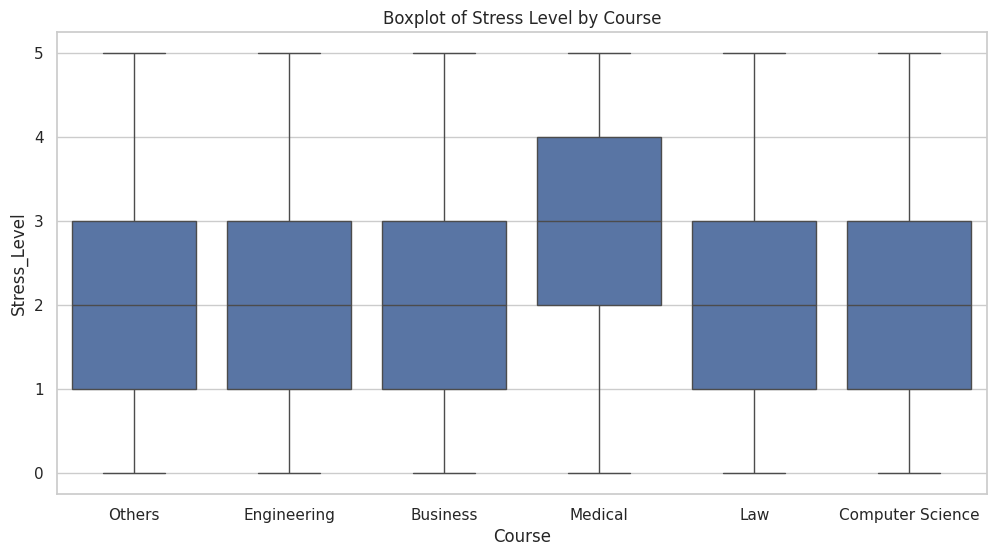

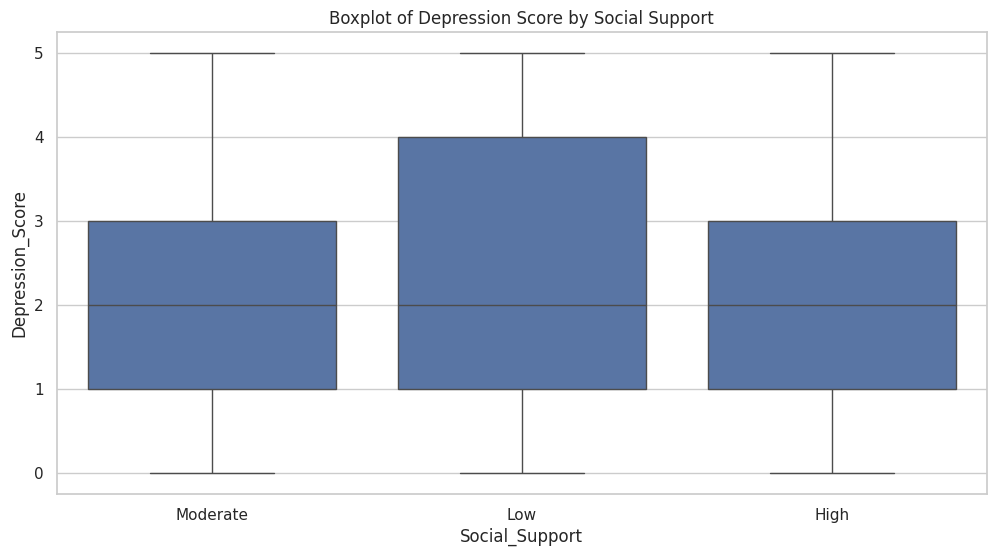

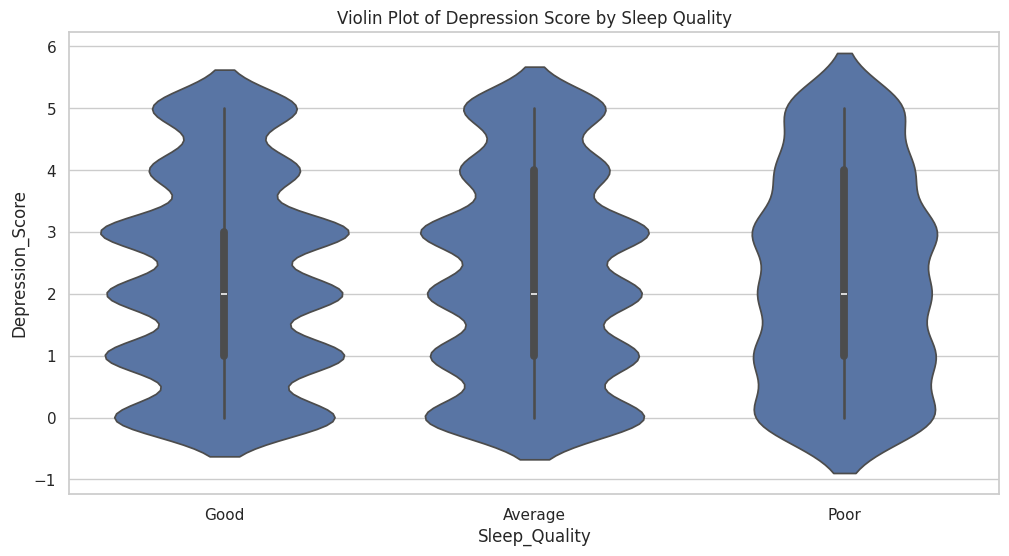

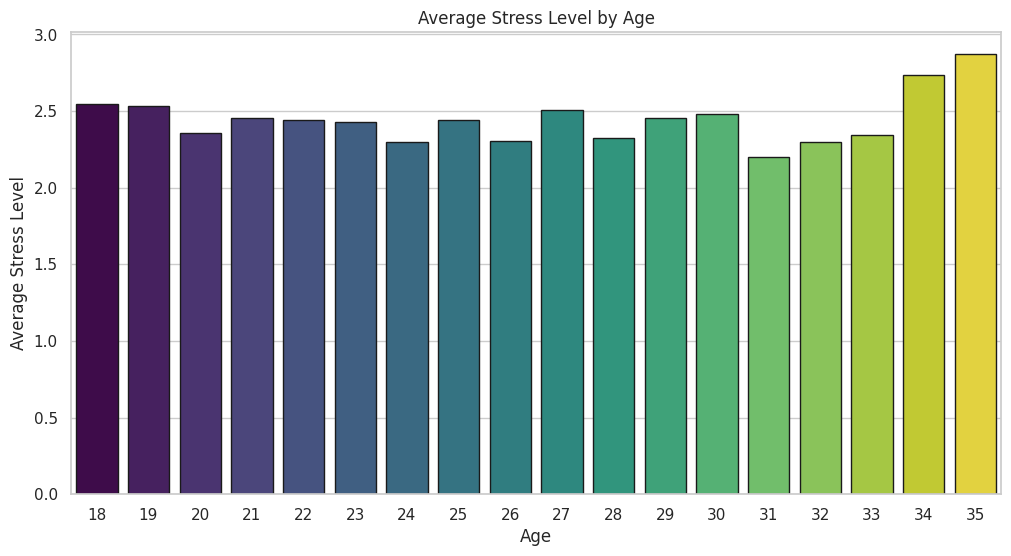

/tmp/ipykernel_114094/1396146294.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")


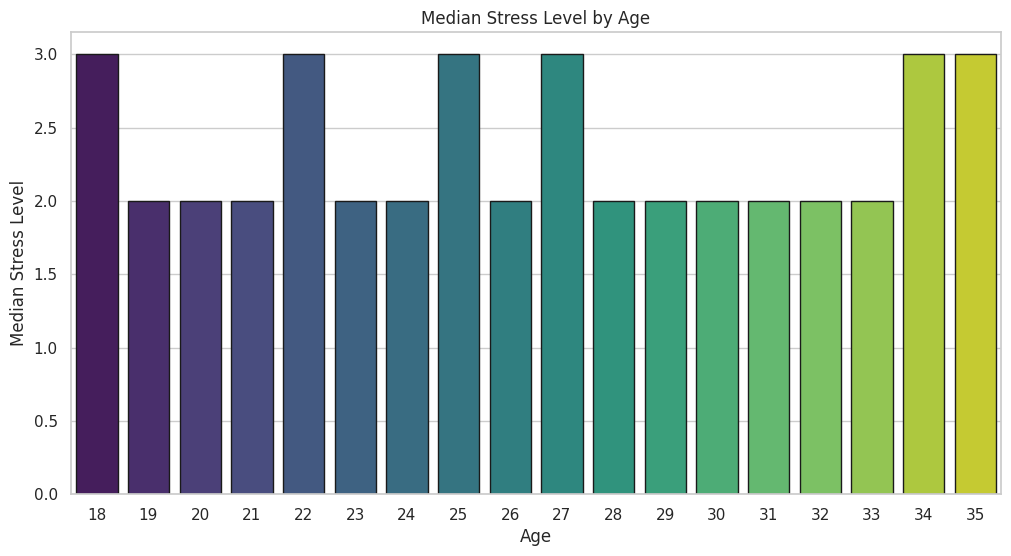

In [26]:
# Plotting a boxplot for 'Course' and 'Stress_Level'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Stress_Level', data=df)
plt.title("Boxplot of Stress Level by Course")
plt.show()
# Plotting a boxplot for 'Social_Support' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Social_Support', y='Depression_Score', data=df)
plt.title("Boxplot of Depression Score by Social Support")
plt.show()
# Plotting a violin plot for 'Sleep_Quality' and 'Depression_Score'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sleep_Quality', y='Depression_Score', data=df)
plt.title("Violin Plot of Depression Score by Sleep Quality")
plt.show()
# Calculating the average stress level for each age
average_stress_by_age = df.groupby('Age')['Stress_Level'].mean().reset_index()

# Plotting the histogram of average stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=average_stress_by_age, hue='Age', palette='viridis', edgecolor="k", legend=False)
plt.title("Average Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Stress Level")
plt.show()
# Calculating the median stress level for each age
median_stress_by_age = df.groupby('Age')['Stress_Level'].median().reset_index()

# Plotting the histogram of median stress level for each age
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Stress_Level', data=median_stress_by_age, palette='viridis', edgecolor="k")
plt.title("Median Stress Level by Age")
plt.xlabel("Age")
plt.ylabel("Median Stress Level")
plt.show()

Zkusili jsme využít boxploty, houslové grafy a historgram pro odhalení nějakých odlehlých hodnot. Problém, nebo spíše dobrá vlastnost naších dat je, že se zde žádné odlehlé hodnoty, které by mohly ovlivnit celou dolovací úlohů a míry polohy nenachází. 

## 2. část


Dolovací úloha: klasifikace úrovně stresu/deprese/úzkosti na základě ostatních vhodných atributů.

Z datové sady je možné odstranit následující atributy:

Pro dolovací úlohu jsou relevantní atributy:  
- Stress_Level  
- Depression_Level  
- Anxiety_Level (jeden z nich)  

### Odstranění irelevantních atributů z datové sady
- ponechat kategorické, numerické, chybějící hodnoty

### Doplnění chybějících hodnot do datové sady

### Odlehlé hodnoty 
- nejsou - není potřeba nic odstraňovat

### 1. varianta - diskretizace kvantitativních atributů

- diskretizace atributů Age, CGPA a Semester_Credit_Load (alespoň jeden z nich potřebujeme nechat v sadě - ideálně CGPA, ať to máme pořádně na čem demostrovat)
- plnění (binning) - rozdělení hodnot na intervaly (po analýze histogramu např.)


### 2. varianta - transformace kategorických atributů na numerické, normalizace kvantitativních atributů

- potřebujeme převést Stress_Level nebo Depression_Score nebo něco takového rozhodně
- dál např. Course, Physical_Activity, Sleep_Quality, Diet_Quality
- nektere atributy mame ordinalni, nektere ne - napr. Course neni ordinalni (je to nominalni I think), ale sleep quality je ordinalni
- nejvíce hodnot má asi atribut Course
- moznosti:
    - rucne priradime ordinalni mapovani hodnot - asi nejlepsi moznost pro ordinalni atributy, vzhledem k tomu, ze mame malo hodnot pro kazdy ten atribut: 

In [ ]:
diet_quality_ordinal_mapping = {'Poor': 0, 'Average': 1, 'Good': 2}
transformed_df = df.copy() #!!! bad bcs je to reference!!!

print("DF")
print(df)
print("transDF")
print(transformed_df)
transformed_df['Diet_Quality'] = df['Diet_Quality'].map(diet_quality_ordinal_mapping)
print("DF")
print(df)
print("transDF")
print(transformed_df)

    - label encoding (vytvori to ale ordinalni usporadani - not good, pokud chceme zachovat ordinalni usporadani, pouzijme rucni encoding, pokud tam nechceme usporadani, labelEncoding ho tam zanese -> nepouzivat!)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df_label_encoding = df

# print(df_label_encoding)
# df_label_encoding['Course'] = label_encoder.fit_transform(df['Course'])
# print(df_label_encoding)


    - one-hot encoding - pro neordinalni atributy good, vytvori to sloupecky s 0 a 1 (prip. True a False) napr. pro kazdy typ kurzu - vzhledem k tomu, ze mame vsude malo hodnot, je to fajne:

In [ ]:
df_one_hot = df.copy()
print(df_one_hot)
df_one_hot = pd.get_dummies(df_one_hot, columns=['Course'], prefix='Course')
print(df_one_hot)

In [ ]:
import pandas as pd


print(df)

# Assuming you already have the DataFrame named 'df'
# Replace 'df' with the actual name of your DataFrame

# Select the column to one-hot encode
column_to_encode = 'Course'

# Check if the column exists in the DataFrame
if column_to_encode in df.columns:
    # Use pd.factorize to get codes and unique values
    codes, unique_values = pd.factorize(df[column_to_encode])

    # Create a DataFrame with 0 and 1 values
    one_hot_df = pd.DataFrame(columns=[f'{column_to_encode}_{value}' for value in unique_values],
                               data=(codes[:, None] == range(len(unique_values))).astype(int))

    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df, one_hot_df], axis=1)

    # Drop the original column that was one-hot encoded
    df = df.drop(column_to_encode, axis=1)
else:
    print(f"Column '{column_to_encode}' not found in the DataFrame.")


Dale provedte normalizaci kvantitativnich atributu, pro ktere to ma smysl

- napr 